<h1 align="center"> Classification Trees using Python </h1>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

## Load the Data
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting Data into Training and Test Sets
One of the benefits of Decision Trees is that you don't have to standardize your data unlike PCA and logistic regression which are [sensitive to effects of not standardizing your data](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

In [3]:
# test_size: what proportion of original data is used for test set
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

## Ignore these Cells (just to show train test split for the blog)

A relatively new feature of pandas is conditional formatting. https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [4]:
X_train['split'] = 'train'
X_test['split'] = 'test'

In [5]:
X_train['target'] = Y_train
X_test['target'] = Y_test

In [6]:
fullDF = pd.concat([X_train, X_test], axis = 0)

In [7]:
fullDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),split,target
61,5.9,3.0,4.2,1.5,train,1
92,5.8,2.6,4.0,1.2,train,1
112,6.8,3.0,5.5,2.1,train,2
2,4.7,3.2,1.3,0.2,train,0
141,6.9,3.1,5.1,2.3,train,2


In [8]:
fullDFsplit = fullDF.copy()
fullDF = fullDF.drop(columns = ['split'])

In [9]:

def highlight_color(s, fullDFsplit):
    '''
    highlight the the entire dataframe cyan.
    '''

    colorDF = s.copy()


    colorDF.loc[fullDFsplit['split'] == 'train', data.feature_names] = 'background-color: #40E0D0'


    colorDF.loc[fullDFsplit['split'] == 'test', data.feature_names] = 'background-color: #00FFFF'

    # #9370DB
    # FF D7 00
    colorDF.loc[fullDFsplit['split'] == 'train', ['target']] = 'background-color: #FFD700'

    # EE82EE
    # BD B7 6B
    colorDF.loc[fullDFsplit['split'] == 'test', ['target']] = 'background-color: #FFFF00'

    return(colorDF)

temp = fullDF.sort_index().loc[0:9,:].style.apply(lambda x: highlight_color(x,pd.DataFrame(fullDFsplit['split'])), axis = None)
temp.set_properties(**{'border-color': 'black',
                       'border': '1px solid black',
                       })

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
# test_size: what proportion of original data is used for test set
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

## Decision Tree

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [11]:
from sklearn.tree import DecisionTreeClassifier

<b>Step 2:</b> Make an instance of the Model

In [12]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [13]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

<b>Step 4:</b> Predict the labels of new data (new flowers)


Uses the information the model learned during the model training process

In [14]:
# Returns a NumPy Array
# Predict for One Observation (image)
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([2])

Predict for Multiple Observations (images) at Once

In [15]:
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

## Measuring Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, [ROC Curve](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0), etc), we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [16]:
score = clf.score(X_test, Y_test)
print(score)

0.8947368421052632


## Finding the Optimal `max_depth`

In [17]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)

    score = clf.score(X_test, Y_test)
    accuracy.append(score)

FileNotFoundError: [Errno 2] No such file or directory: '../images/max_depth_vs_entropy.png'

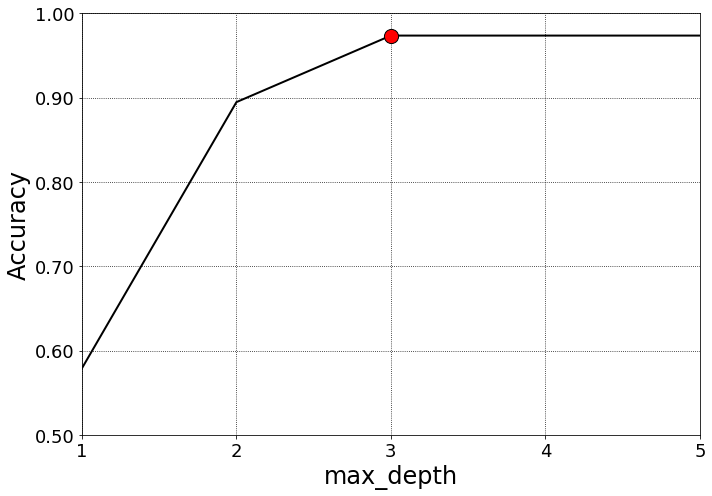

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

marker_style = dict(color='tab:blue', linestyle=':', marker='o',
                    markersize=15, markerfacecoloralt='tab:red')

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k',
        zorder = 0)

s = ax.scatter(max_depth_range[2],
           accuracy[2],
           color = 'r',
           s = 200,
           alpha = 1,
           zorder = 10,
           marker = 'o',)

s.set_edgecolor( 'black' )



ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 1,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
fig.savefig('../images/max_depth_vs_entropy.png', dpi = 300)

## Depth is Not Always Equal to Max_Depth

In [54]:
from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:

accuracy = []
depth_list = []
for max_depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = max_depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    depth = clf.get_depth()
    depth_list.append(depth)
    accuracy.append(score)
    
    outputFileDot = "../images/BadDepthExample" + str(max_depth)+'_actual'+str(depth)+ ".dot"
    outputFilePng = "../images/BadDepthExample" + str(max_depth)+'_actual'+str(depth)+ ".png"


## Feature Importance

Scikit-learn allows you to calculate feature importance which is the total amount that Gini index or Entropy decrease due to splits over a given feature

In [80]:
clf = DecisionTreeClassifier(max_depth = 3, 
                         random_state = 0)
clf.fit(X_train, Y_train)

score = clf.score(X_test, Y_test)

In [81]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal width (cm),0.578
2,petal length (cm),0.422
0,sepal length (cm),0.000
1,sepal width (cm),0.000


If a feature has a low feature importance value, it doesnt necessarily mean that the feature isnt important for prediction, it just means that the particular feature wasnt chosen at a particularly early level of the tree. Could be that the feature could be identical or highly correlated with another informative feature. Feature importance values dont tell you which class they are very predictive for or relationships between features which may influence prediction

## Decision Path
Can also explore other features of decision trees

In [16]:
from sklearn.tree.export import export_text

In [17]:
print(export_text(clf, feature_names=data.feature_names))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.95
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.95
|   |   |--- petal length (cm) <= 5.05
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  5.05
|   |   |   |--- class: 2



## Visualizing Decision Tree 
Image Here
If you are curious about how to visualize your decision tree, please see my tutorial. 

This is something I will cover in a future tutorial